# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.text_proc import illustration
from jcopml.plot import plot_missing_value
from jcopml.plot import plot_confusion_matrix
from jcopml.plot import plot_roc_curve
from jcopml.plot import plot_classification_report
from jcopml.plot import plot_pr_curve

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

sw_english = stopwords.words('english') 
import string

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import Dataset

In [2]:
df = pd.read_csv('yelp.csv', parse_dates=["date"])
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   business_id  10000 non-null  object        
 1   date         10000 non-null  datetime64[ns]
 2   review_id    10000 non-null  object        
 3   stars        10000 non-null  int64         
 4   text         10000 non-null  object        
 5   type         10000 non-null  object        
 6   user_id      10000 non-null  object        
 7   cool         10000 non-null  int64         
 8   useful       10000 non-null  int64         
 9   funny        10000 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 781.4+ KB


In [4]:
df.shape

(10000, 10)

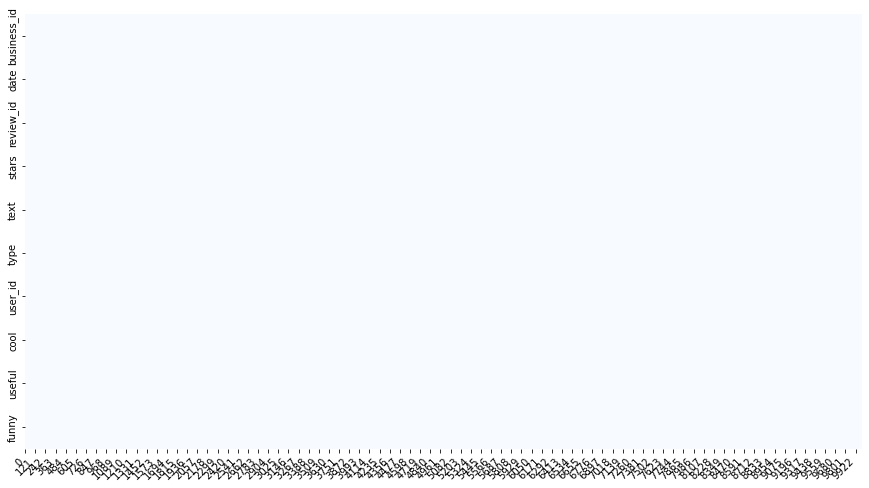

In [5]:
plot_missing_value(df)

### Data Description

In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
df.groupby('stars').describe()

cool                                                useful            \
        count      mean       std  min  25%  50%  75%   max   count      mean   
stars                                                                           
1       749.0  0.576769  1.474759  0.0  0.0  0.0  1.0  17.0   749.0  1.604806   
2       927.0  0.719525  1.491182  0.0  0.0  0.0  1.0  14.0   927.0  1.563107   
3      1461.0  0.788501  1.602576  0.0  0.0  0.0  1.0  18.0  1461.0  1.306639   
4      3526.0  0.954623  2.034367  0.0  0.0  0.0  1.0  38.0  3526.0  1.395916   
5      3337.0  0.944261  2.484583  0.0  0.0  0.0  1.0  77.0  3337.0  1.381780   

       ...              funny                                                
       ...  75%   max   count      mean       std  min  25%  50%  75%   max  
stars  ...                                                                   
1      ...  2.0  20.0   749.0  1.056075  2.480309  0.0  0.0  0.0  1.0  30.0  
2      ...  2.0  17.0   927.0  0.875944  1.837553  0.0  0.0  0.0  1.0  20.0  
3      ...  2.0  19.0  1461.0  0.694730  1.643553  0.0  0.0  0.0  1.0  24.0  
4      ...  2.0  38.0  3526.0  0.670448  1.962417  0.0  0.0  0.0  1.0  57.0  
5      ...  2.0  76.0  3337.0  0.608631  1.815606  0.0  0.0  0.0  1.0  39.0  

[5 rows x 24 columns]

### Count a Character in Review Text

In [8]:
df['Length_Char'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length_Char
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<AxesSubplot:ylabel='Frequency'>

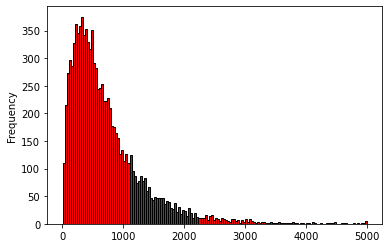

In [9]:
# Visualize a length of Character in text message

df['Length_Char'].plot.hist(bins = 150, edgecolor='black', color='red')

In [10]:
df.Length_Char.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: Length_Char, dtype: float64

In [11]:
#Grab the maximum character in text message

df[df['Length_Char'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

## Visualize Distribution

### Visualize the length character of each text review

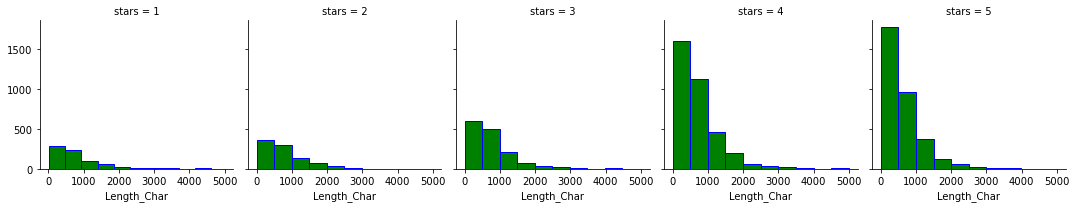

In [12]:
visualize = sns.FacetGrid(df,col='stars')
visualize.map(plt.hist,'Length_Char', color = 'g', edgecolor = 'b')

### Boxplot

<AxesSubplot:xlabel='stars', ylabel='Length_Char'>

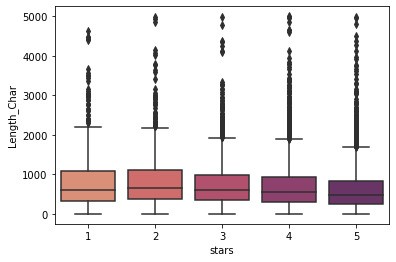

In [13]:
sns.boxplot(x='stars',y='Length_Char',data=df, palette='flare')

### Visualize stars rate 

<AxesSubplot:xlabel='stars', ylabel='count'>

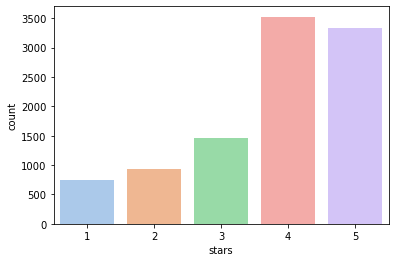

In [14]:
sns.countplot(x='stars',data=df,palette='pastel')

## Correlation Matrix

In [15]:
stars = df.groupby('stars').mean()
stars

,cool,useful,funny,Length_Char
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


<AxesSubplot:>

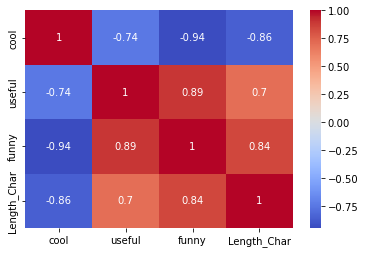

In [16]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## Cleaning Dataset

In [17]:
df.text

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate. Rice is so good and I als...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
                              ...                        
9995    First visit...Had lunch here today - used my G...
9996    Should be called house of deliciousness!\n\nI ...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 10000, dtype: object

In [18]:
def clean_data(text):
    text = text.lower()
    clean_word = word_tokenize(text)
    clean_word = [word for word in clean_word if word not in punctuation]
    clean_word = [word for word in clean_word if word not in sw_english]
    clean_word = ' '.join(clean_word)
    return clean_word

In [19]:
df.text = df.text.apply(clean_data)
df.text

0       wife took birthday breakfast excellent weather...
1       idea people give bad reviews place goes show p...
2       love gyro plate rice good also dig candy selec...
3       rosie dakota love chaparral dog park 's conven...
4       general manager scott petello good egg go deta...
                              ...                        
9995    first visit ... lunch today used groupon order...
9996    called house deliciousness could go item item ...
9997    recently visited olive ivy business last week ...
9998    nephew moved scottsdale recently bunch friends...
9999    4-5 locations .. 4.5 star average .. think ari...
Name: text, Length: 10000, dtype: object

In [20]:
#Only take a 1 or 5 stars in text review

df = df[(df.stars==1) | (df.stars==5)]

In [21]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length_Char
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,wife took birthday breakfast excellent weather...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,idea people give bad reviews place goes show p...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota love chaparral dog park 's conven...,review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello good egg go deta...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop 're drive ate go back next day food good ...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


## Check Imbalanced Dataset

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

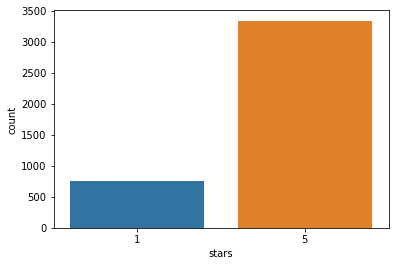

In [22]:
sns.countplot(df.stars)

In [23]:
df.stars.value_counts(normalize=True)

5    0.816691
1    0.183309
Name: stars, dtype: float64

In [24]:
X = df.text
y = df.stars

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3268,), (818,), (3268,), (818,))

# Modeling

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from jcopml.tuning import random_search_params as rsp

In [26]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer()),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.7419203085006956, 'algo__gamma': 1, 'algo__learning_rate': 0.27762530094438326, 'algo__max_depth': 7, 'algo__n_estimators': 113, 'algo__reg_alpha': 0.09444574254983565, 'algo__reg_lambda': 0.12329098365270522, 'algo__subsample': 0.5137705091792748}
0.9938800489596084 0.9130981766511375 0.9180929095354523


# 6. Hyperparameters Tuning

In [27]:
from jcopml.tuning.space import Integer, Real

In [28]:
pipeline = Pipeline([
    ('prep', TfidfVectorizer()),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

parameter = {'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-4, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=100, high=350),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__gamma': Integer(low=3, high=10),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=0.8, prior='log-uniform')}

model = RandomizedSearchCV(pipeline, parameter, cv=3, n_iter=75, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  6.0min finished
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'algo__colsample_bytree': 0.8725714766587107, 'algo__gamma': 3, 'algo__learning_rate': 0.05240577158421572, 'algo__max_depth': 7, 'algo__n_estimators': 316, 'algo__reg_alpha': 0.29955205603841967, 'algo__reg_lambda': 0.02725020460470398, 'algo__subsample': 0.5671637367652818}
0.9810281517747858 0.9115677205752268 0.9242053789731052


# 7. Evaluation

## 7.1. Classification Report

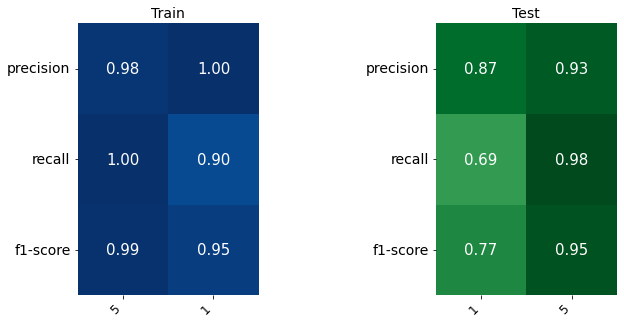

In [29]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [30]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           1       1.00      0.90      0.95       599
           5       0.98      1.00      0.99      2669

    accuracy                           0.98      3268
   macro avg       0.99      0.95      0.97      3268
weighted avg       0.98      0.98      0.98      3268


Test report
              precision    recall  f1-score   support

           1       0.87      0.69      0.77       150
           5       0.93      0.98      0.95       668

    accuracy                           0.92       818
   macro avg       0.90      0.83      0.86       818
weighted avg       0.92      0.92      0.92       818



## 7.2. Confusion Matrix

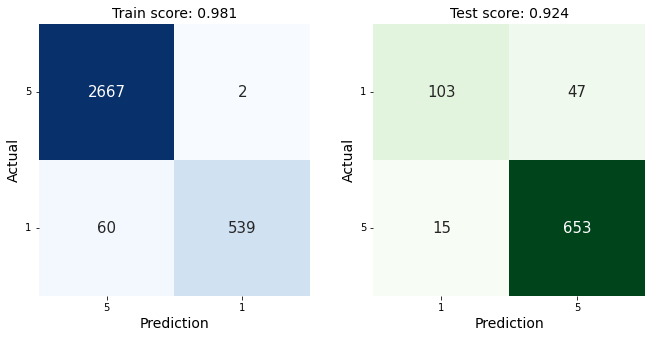

In [31]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

### Result Analysis

In [32]:
df_analysis = pd.DataFrame(X_test, columns=['text'])
df_analysis['Prediction'] = model.predict(X_test)
df_analysis['Actual'] = y_test
df_analysis

,text,Prediction,Actual
5185,driving around chandler area find decent place...,5,1
3898,ever eaten somewhere ca n't get craving head g...,5,5
6841,filly-b 's 8 reviews nine wow miss place 24hrs...,5,5
1437,went first time last night `` `` girls '' two ...,5,5
2001,shopping lee lee 's ten years store stocks chi...,5,5
...,...,...,...
3919,camus cute little trendy bar/restaurant locate...,5,5
2275,place rad time az high end sneaker boutique se...,5,5
1498,place gem food amazing 's cheap service good f...,5,5
9350,great place extremity valley serve korean japa...,5,5


In [33]:
df_analysis[(df_analysis['Prediction'] == 1) & (df_analysis['Actual'] == 5)] 

,text,Prediction,Actual
4752,review directly joe works specific location fi...,1,5
2510,would typically never write review strbucks me...,1,5
3248,went sister 2 days ago first time eating famou...,1,5
1404,excellent customer service super clean food 's...,1,5
4034,`` fine dining '' setting n't good food many t...,1,5
6779,terrible decision make euthanize 20 year old c...,1,5
7466,'ve often driven figured 'd go take look somet...,1,5
5614,ok hesitated writing review place like 's busy...,1,5
8262,friends place get authentic chinese food servi...,1,5
6819,loved place since open changed menu little see...,1,5


In [34]:
df_analysis[(df_analysis['Prediction'] == 5) & (df_analysis['Actual'] == 1)] 

,text,Prediction,Actual
5185,driving around chandler area find decent place...,5,1
8532,bill 150.00 free appetizer coupon sent via ema...,5,1
7803,'m sad report dined lunch inedible chef aaron ...,5,1
436,another place would give stars possible 's cor...,5,1
4686,update location closed boo,5,1
7586,'s months since 've change better usually get ...,5,1
9319,ha hahahahaha `` pit '' right .... man place w...,5,1
9342,bought deal living social waited call figuring...,5,1
6232,going brutal hide children 've chipotle 'll fe...,5,1
289,'d say 've clubhouse times year past five year...,5,1


# Save Model

In [35]:
save_model(model.best_estimator_, 'Yelp_Dataset_Classification_XGBoost_Classifier.pkl')

Model is pickled as model/Yelp_Dataset_Classification_XGBoost_Classifier.pkl
